<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/landau_zener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Landau-Zener transition

We use code from https://notebook.community/cgranade/qutip-notebooks/examples/example-landau-zener

Our aim is to simulate the Landau-Zener transition. To do this we solve the Schrodinger equation for a qubit system with the Lnadan-zener Hamiltonian



The Landau-Zener effect describes non-adiabatic transitions between two energy levels in a quantum system as an external parameter $\lambda$ changes. The Hamiltonian is:

$$H(t) = g \sigma_x +\lambda t \sigma_z$$

The probability of transition $P$ is given by the Landau-Zener formula:

$$ P_{excited}(t\rightarrow \infty) = \exp\left(-\frac{\pi g^2}{2\hbar |\dot{\lambda}|}\right) $$

where $\Delta$ is the energy gap, $\hbar$ is the reduced Planck constant, and $\dot{\lambda}$ is the rate of change of the external parameter. This effect is crucial for understanding quantum systems, particularly in condensed matter physics.



In [ ]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 42.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import time

In [ ]:
def qubit_integrate(delta, eps0, A, gamma1, gamma2, psi0, tlist):
    """ This subroutine integrates Schrodinger equation
    Input:
    A      ---> speed
    delta  -- > qubit gap
    eps0   ---> a finite sigmaz weight
    gamma1 ---> relaxation rate
    gamma2 ---> dephasing rate
    psi0   ---> initial state
    tlist  ---> List with times where to reproduce solution
    """

    # Hamiltonian
    sx = sigmax()
    sz = sigmaz()
    sm = destroy(2)

    H0 = - delta/2.0 * sx - eps0/2.0 * sz
    H1 = - A/2.0 * sz

    # collapse operators
    c_op_list = []
    #|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
    # This part is not needed for the unitary evolution without noise ||||||||||||||||
    n_th = 0.0 # zero temperature

    # relaxation
    rate = gamma1 * (1 + n_th)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * sm)

    # excitation
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * sm.dag())

    # dephasing
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * sz)
    #|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

    # evolve and calculate expectation values

    # method 3: a string that defines the coefficient. The solver generates
    # and compiles C code using cython. This method is usually the fastest
    # for large systems or long time evolutions, but there is fixed-time
    # overhead that makes it inefficient for small and short-time evolutions.
    H = [H0, [H1, 't']]
    output = mesolve(H, psi0, tlist, c_op_list, [sm.dag() * sm], {})

    return output.expect[0]

In [ ]:
# set up the calculation
#
delta = 0.5    # qubit sigma_x coefficient, our g cioefficient

In [ ]:
eps0  = 1e-10  # qubit sigma_z coefficient

In [ ]:
# set up the calculation
#
delta = 0.5    # qubit sigma_x coefficient, our g cioefficient
eps0  = 1e-10  # qubit sigma_z coefficient
A     = 1      # sweep rate, our delta
gamma1 = 0.0           # relaxation rate
gamma2 = 0.0           # dephasing  rate
psi0 = basis(2,0)      # initial state
tlist = np.linspace(-100, 100, 100)

In [ ]:
start_time = time.time()
p_ex = qubit_integrate(delta, eps0, A, gamma1, gamma2, psi0, tlist)
print('time elapsed = ' + str(time.time() - start_time))

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: args will be keyword only from qutip 5.3 for all solver
  warnings.warn(


[1/1] Cythonizing qtcoeff_e3b98a4da31a127d4bde6e43033f66.pyx


INFO:root:running build_ext
INFO:root:building 'qtcoeff_e3b98a4da31a127d4bde6e43033f66' extension
INFO:root:creating build/temp.linux-x86_64-cpython-311
INFO:root:x86_64-linux-gnu-g++ -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.11/dist-packages/qutip/core/data -I/usr/local/lib/python3.11/dist-packages/numpy/_core/include -I/usr/include/python3.11 -c qtcoeff_e3b98a4da31a127d4bde6e43033f66.cpp -o build/temp.linux-x86_64-cpython-311/qtcoeff_e3b98a4da31a127d4bde6e43033f66.o -w -O3 -funroll-loops
INFO:root:creating build/lib.linux-x86_64-cpython-311
INFO:root:x86_64-linux-gnu-g++ -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -shared -Wl,-O1 -Wl,-Bsymbolic-functions build/temp.linux-x86_64-cpython-311/qtcoeff_e3b98a4da31a127d4bde6e43033f66.o -L/usr/lib/x86_64-linux-gnu -o build/lib.linux-x86_64-cpython-311/qtcoe

time elapsed = 16.827191829681396


In [ ]:
np.shape(tlist)
print(type(p_ex))
print(p_ex.shape, p_ex[-1])

<class 'numpy.ndarray'>
(100,) 0.32009566309989707


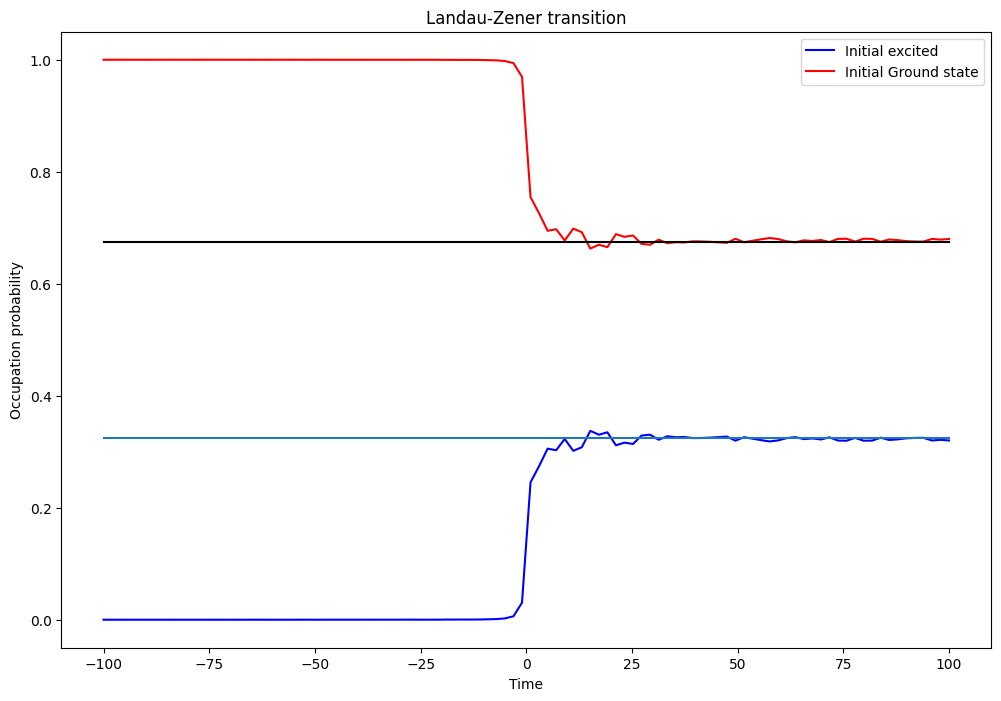

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(tlist,  np.real(p_ex), 'b', tlist, np.real(1-p_ex), 'r')
ax.plot(tlist, 1 - np.exp(-np.pi * delta **2 / (2 * A)) * np.ones(np.shape(tlist)),tlist, np.exp(-np.pi * delta **2 / (2 * A)) * np.ones(np.shape(tlist)), 'k')
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Landau-Zener transition')
ax.legend(("Initial excited","Initial Ground state"), loc=0);

0.09223132417727666
0.3201157287565883
0.793988866336393
0.9703433871815544
0.9993125341319121
0.9996402045641524
0.9989911252023769


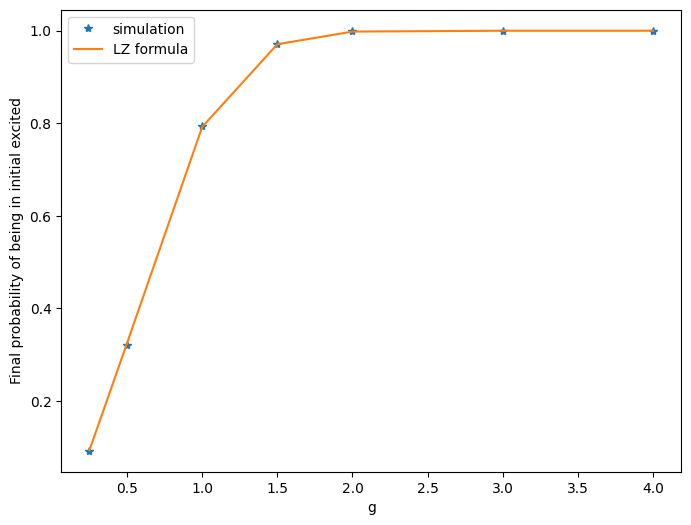

In [ ]:
plt.figure(figsize=(8, 6))

# set up the calculation
#
delta = 2     # qubit sigma_x coefficient
eps0  = 0.001  # qubit sigma_z coefficient
A     = 1    # sweep rate
psi0 = basis(2,0)      # initial state

tlist = np.linspace(-100.0, 100.0, 5000)
delta_values = np.array([0.25,0.5,1,1.5,2,3,4])
p_ex_final = []
for delta1 in delta_values:
    p_ex = qubit_integrate(delta1, eps0, A, gamma1, gamma2, psi0, tlist)
    print(p_ex[-1])
    p_ex_final.append(p_ex[-1])
#     p_ex_final.append(np.real(p_ex))
# print(p_ex_final)
# print(f'Time elapsed for gamma1={gamma1}: {time.time() - start_time:.2f} seconds')
plt.plot(delta_values, p_ex_final, "*", label = "simulation")
plt.plot(delta_values,  1-np.exp(-np.pi * delta_values **2 / (2 * A) ), label = "LZ formula" )
# matplotlib.pyplot.yscale(value, **kwargs)
plt.xlabel('g')
plt.ylabel('Final probability of being in initial excited')
# plt.title('Final Excitation Probability vs Delta')
plt.legend()
# plt.grid()
# plt.show()

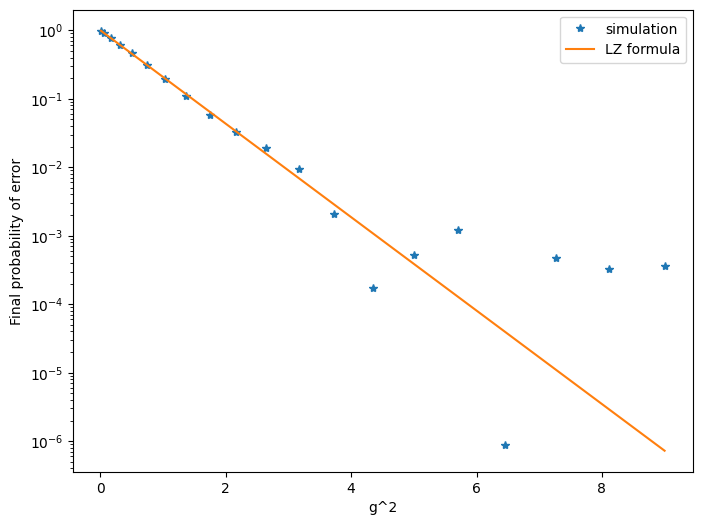

In [ ]:
plt.figure(figsize=(8, 6))

# set up the calculation
#
delta = 2     # qubit sigma_x coefficient
eps0  = 0.001  # qubit sigma_z coefficient
A     = 1    # sweep rate
psi0 = basis(2,0)      # initial state

tlist = np.linspace(-100.0, 100.0, 5000)
delta_values = np.linspace(0.1,3,20)
p_ex_final = []
for delta1 in delta_values:
    p_ex = qubit_integrate(delta1, eps0, A, gamma1, gamma2, psi0, tlist)
    p_ex_final.append(p_ex[-1])
#     p_ex_final.append(np.real(p_ex))
# print(p_ex_final)
# print(f'Time elapsed for gamma1={gamma1}: {time.time() - start_time:.2f} seconds')
plt.plot(delta_values**2, np.ones(len(p_ex_final))-p_ex_final, "*", label = "simulation")
plt.plot(delta_values**2,  np.exp(-np.pi * delta_values **2 / (2 * A) ), label = "LZ formula" )
plt.yscale("log")
plt.xlabel('g^2')
plt.ylabel('Final probability of error')
# plt.title('Final Excitation Probability vs Delta')
plt.legend()
# plt.grid()
# plt.show()